<a href="https://colab.research.google.com/github/KharismadinaHM/Darth-urany/blob/master/M4_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NAMA : Kharismadina Hijra Muhamad
### NPM  : 13119305
### KELAS: 3KA01

### Overview Dataset

"Data Komponen Beton".

Data set ini berisikan beberapa kategori sebagai berikut
* cement (kg)
* slag (blast furnace slag, kg)
* ash (fly ash, kg)
* water (kg)
* superplastic (superplasticizer, kg)
* coarseagg (coarse aggregate, kg)
* fineagg (fine aggregate, kg)
* age (days, 1-365)
* strength (Concrete compressive strength, MPa)

# Exploratory Data Analysis (EDA)


# Instruksi Tugas Praktikum FIKTI dan FTI

1. Buat univariate dan bivariate analysis untuk data set di atas
2. Jelaskan kesimpulan yang bisa di ambil dari analysis yg anda lakukan


<a id="1"></a>

# 1. Pengambilan Data:

## 1.1 Import packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

## 1.2 Import data

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv")
data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


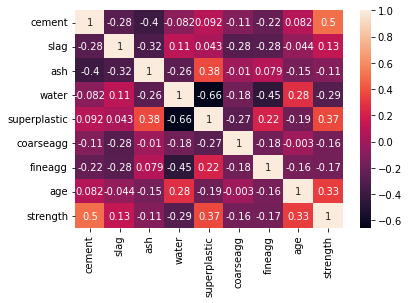

In [5]:
sns.heatmap(data.corr() , annot=True)

### MENCARI KATEGORI DATA YG AKAN DIANALISIS
 Dari Heatmap diatas bisa didapatkan bahwa kategori data strength dan cement memiliki korelasi tertinggi. Maka , Kedua data tersebut akan diAnalisi lebih lanjut.

# 2. EDA

## 2.1.Univariate analysis
<a id="2"></a>

## 2.1.1 Strength

### **i.	Distribusi**

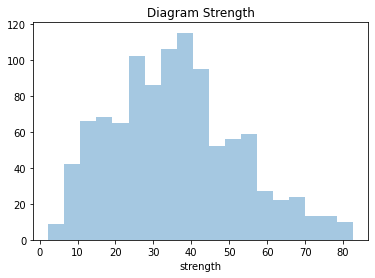

In [11]:
# Buat diagram di sini
sns.distplot(a=data['strength'], kde= False)
plt.title("Diagram Strength")
plt.show()

In [13]:
data[data['strength']==40].shape

(379, 9)

In [17]:
data['strength'].describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: strength, dtype: float64

### **ii.	Deskripsi**

Diagram Strength ini menunjukkan pada kisaran range 30 sampai ke 45 memiliki data tertinggi dibanding dengan lainnya.

## 2.1.2 Cement

### **i. Diagram**

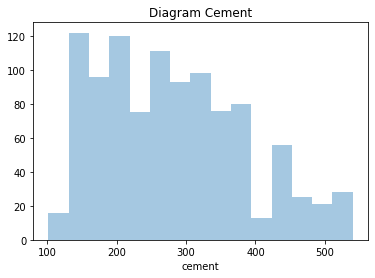

In [14]:
# Buat diagram di sini
sns.distplot(a=data['cement'], kde= False)
plt.title("Diagram Cement")
plt.show()

In [16]:
data['cement'].describe()

count    1030.000000
mean      281.167864
std       104.506364
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: cement, dtype: float64

### **ii.	Deskripsi**
Diagram cement , memiliki jumlah yang hampir sama di range 130 - 400. dan juga cukup stabil.

<a id="3"></a>
# 2.2.Bivariate analysis

## 2.2.1 [Component Name]

### i. **Boxplot**

In [25]:
def binning(x):
  if(100<x<=150):
    return '<=150'
  elif(150 < x <=200):
    return '151-200'
  elif(200<x<=250):
    return '201-250'
  elif (250 < x <= 300):
    return '251-300'
  elif (300 < x <= 350):
    return '301-350'
  elif (350 < x <= 400):
    return '351-400'
  elif (400 < x <= 450):
    return '401-450'
  elif (450 < x <= 500):
    return '451-500'
  else:
    return '501-550'

In [26]:
data['cement_bins'] = data.cement.apply(lambda x: binning(x))

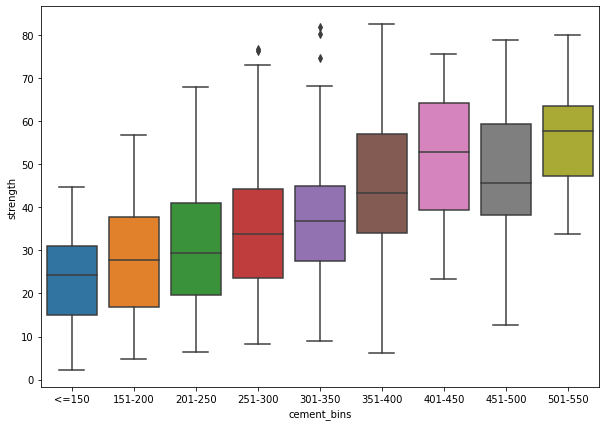

In [27]:
# Buat diagram di sini
bins_order = ['<=150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501-550']
fig = plt.figure(figsize=(10, 7)) 
sns.boxplot(x="cement_bins", y="strength", data=data, order=bins_order)
plt.show()

### ii. Deskripsi

Data diatas menjelaskan bahwa  bagaimana hubungan data strength dan data cement , yaitu semakin besar cement makan strength juga akan mengikuti jadi berbanding lurus. 

### iii. Uji Hipotesis
**Two sampled T-test** :-Uji Independent Samples t Test atau 2-sample t-test membandingkan rata-rata dua kelompok independen untuk menentukan apakah ada bukti statistik bahwa rata-rata populasi terkait berbeda secara signifikan.


Tentukan null dan alternate hypothesis.

    Secara umum, null hypothesis akan menyatakan bahwa kedua populasi yang diuji tidak memiliki perbedaan yang signifikan secara statistik.
    alternate hypothesis akan menyatakan bahwa ada perbedaan.

Dalam contoh ini kita dapat mengatakan bahwa:
*  Null Hypothesis :- tidak ada perbedaan Rerata usia kelompok pendapatan >50k dan kelompok pendapatan <=50k.
*  Alternate Hypothesis :- ada perbedaan Rerata usia kelompok pendapatan >50k dan kelompok pendapatan <=50k.

In [29]:
# Buat uji hipotesis untuk menentukan null atau alternate hypothesis
statistic, p_value = stats.ttest_rel(data.strength, data.cement)
print('p-value adalah : ', p_value)

if p_value < 0.05:
  print("Hipotesis null ditolak!!")
else:
  print("Hipotesis diterima!")


p-value adalah :  0.0
Hipotesis null ditolak!!


### iv. Kesimpulan akhir

**Pada p-value nernilai 0 maka dapat disimpulkan ini menolak hipotesis null yang berarti data strength dan cement saling berpengaruh dan berhubungan.**


